# EBA3500 Mock home exam

This mock exam is part of the curriculum, and you should try to do it before
the real home exam. The real home exam will be similar to this one, and you will
benefit from taking this mock home exam seriously! 

**"Brevity is the soul of wit."** There will be some rules for how you're allowed
to write the final exam. Importantly, you must not write too much, or provide 
too much output. Give us what is relevant. I will make this clearer later. 

You need to be selective in the output you show. Only show output that supports
your argument. To hide output of a cell, you may use a semi-colon ";":


In [ ]:
list(range(100000));


**Note:** This mock exam has not been double-checked for errors and typos. If
you come across any, please e-mail me.

## Task I: Applied regression

We will use the following data set.

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

Our goal is to predict to variable `Lottery` from the other variables in the model.

In [2]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

## (a) Using the data

Notice the following about the categorical variable `Departement`:

In [3]:
len(set(dat.Department))

86

It would be silly use this variable as a covariate in a regression model. Why? Are there any other covariates in the data frame with the same problem? Modify `dat` so it doesn't have problems with covariate vectors being useless in this sense.

### (b) Taking an initial look at the data

Use an appropriate plotting function to take a look at the data. Moreover, take
a look at some data summaries such as the correlation matrix and category plots,
if applicable.

In [5]:
dat.corr().Lottery

dept              -0.109124
Crime_pers         0.002605
Crime_prop         0.434235
Literacy          -0.364734
Donations          0.151263
Infants            0.415755
Suicides           0.490058
Wealth             0.480636
Commerce           0.450016
Clergy            -0.280125
Crime_parents      0.282362
Infanticide       -0.346770
Donation_clergy    0.361800
Lottery            1.000000
Desertion         -0.302986
Instruction        0.372167
Prostitutes       -0.284407
Distance           0.277131
Area               0.232041
Pop1831           -0.468502
Name: Lottery, dtype: float64

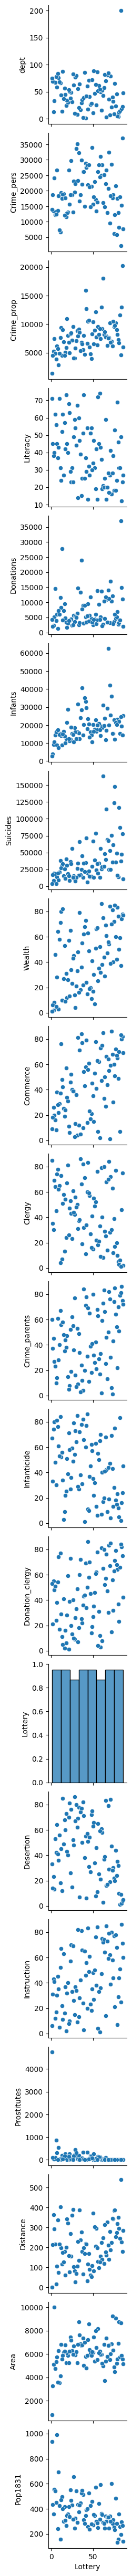

In [7]:
import seaborn as sns
import matplotlib.pylab as plt
sns.pairplot(dat, x_vars = "Lottery")
plt.show()

### (c) Transforms
Some the covariates in this data set would may benefit from being transformed. Try out the logarithmic and quadratic transforms on the numeric columns of the data frame (except for `Lottery`), and compare the resulting pairwise correlations to what you obtained without doing the transforms.

In [41]:
import pandas as pd

dtypes = set([dat.dtypes.values[0], dat.dtypes.values[-1]])
names = [x for x, y in zip(dat.columns, dat.dtypes) if y in dtypes and x != "Lottery"]

corr_sq = [
    smf.ols("Lottery ~ " + x + "+" + x + "**2", dat).fit().rsquared for x in names
]

corr_log = [smf.ols("Lottery ~ " + "I(np.log(" + x + "+1))", dat).fit().rsquared for x in names]

corr_uni = [smf.ols("Lottery ~ " + x, dat).fit().rsquared for x in names]





### (d) Evaluating models
Fit at least five regression models and make an informed choice among them.
Do **not** show the entire output of the models you look at. (**Hint:** You have
learned about ANOVA tables, *F*-tests, and the adjusted $R^2$. But you may
also think about what makes sense, the principle of parsimony, and so on.)

### (e) Making predictions

In this exercise, we're going to use the model

In [42]:
results = smf.ols('Lottery ~ Literacy + Donations +Infants +Suicides + MainCity', data=dat).fit()

#### (i) Make speficic predictions

Predict the values of Lottery when `Literacy`, `Donations`, `Infants`, and `Suicides` are as in the following table:
| Literacy | Donations | Infants | Suicides | MainCity | 
| - | - | - | - | - |
| 20 |	4000 |	10000 |	10000 |	2:Med |
| 50 |	7777 |	1 |	1	| 2:Med |
| 0 |  0 |       0 |   0 | 3:Lg |
 

#### (ii) All predictions

Predict the values of `Lottery` given the observed values `Literacy`, `Donations`, `Infants`, and `Suicides`. Plot the observed values against the predicted values. Do you see a pattern?

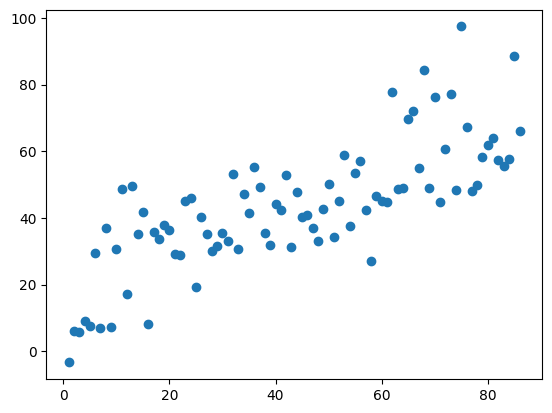

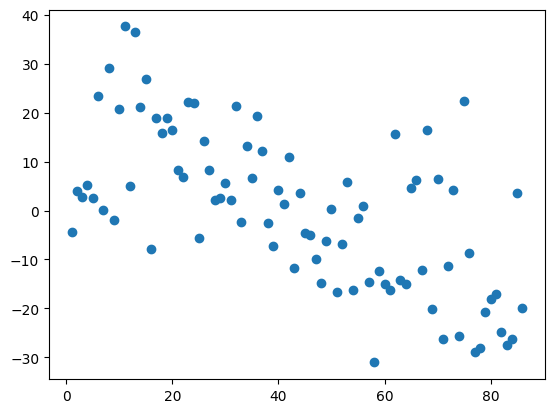

In [46]:
fitted = results.predict()
plt.scatter(dat.Lottery, fitted)
plt.show()
plt.scatter(dat.Lottery, fitted - dat.Lottery)
plt.show()

### (f) Missing covariates (1)
Suppose we have chosen to use the model in (e). Your uncle Bob comes along with a vector of new data. He wants you to predict the value of `Lottery`, but he has forgotten if `MainCity` equals `2:Med` or `3:Lg`. He knows everything else that you need to know. How would you use the model in (e) so it's able to predict the value of `Lottery` given his data? You may assume Uncle Bob's vector is the first of the table in the previous exercise, but with `MainCity` equal to either `2:Med` or `3:Lg`, if you wish to compute something. 

In [48]:
from collections import Counter
Counter(dat.MainCity)
# prob 2:Med 66/76
# prob 3:lg 10/76

Counter({'2:Med': 66, '1:Sm': 10, '3:Lg': 10})

In [55]:
lg = results.predict(
    {
        "Literacy": 20,
        "Donations": 4000,
        "Infants": 20000,
        "Suicides": 10000,
        "MainCity": "3:Lg",
    }
)
med = results.predict(
    {
        "Literacy": 20,
        "Donations": 4000,
        "Infants": 20000,
        "Suicides": 10000,
        "MainCity": "2:Med",
    }
)

[(lg * 10 + med * 66) / 76, lg, med]

[0    36.921169
 dtype: float64,
 0    11.560222
 dtype: float64,
 0    40.763737
 dtype: float64]

### (g) Missing covariates (2)
The following week, Bob visits again. This time he remembered `MainCity`, be he has forgotten `Donations` and `Suicides`. Modify the model in (e) so that it works in this scenario as well.

## Task II: Algorithms for regression

In this task, you will make a program doing *backward* regression. See e.g. [this page](https://quantifyinghealth.com/stepwise-selection/) for more info. (Scroll down to backwards stepwise regression.) The point of backward regression is to iteratively fit regression models, removing one covariate at a time, starting out with the biggest model.

### (a) Find the least significant set of predictors
Figure out how to extract the name of the predictor associated with the biggest *p*-value in
an ANOVA table, i.e., `sm.stats.anova_lm(fit, typ=1)`. Make a function `largest_p_value` that takes a fitted `statsmodels.regression.linear_model.RegressionResultsWrapper` object and returns the name of the covariate / group of covariates with the largest *p*-value.

(***Hint:*** `sm.stats.anova_lm` is a data frame. You might want to use `numpy.argmax`).


In [56]:
frame = sm.stats.anova_lm(results, typ=1)["PR(>F)"] 
frame

MainCity     1.714424e-12
Literacy     5.029197e-05
Donations    2.335629e-01
Infants      7.952435e-01
Suicides     1.881632e-04
Residual              NaN
Name: PR(>F), dtype: float64

Here `largest_p_value(results)` will return `"Infants"`, the name of the covariate with the largest *p*-value.

In [85]:
def largest_p_value(result):
    frame = sm.stats.anova_lm(result, typ=1)["PR(>F)"]
    index = frame.argmax()
    return frame.index[index]

largest_p_value(results)

'Infants'

### (b) Removing covariate from formula
Make a function `remove_covariate(formula, covariate)` that removes `covariate` from `formula`. For instance, `remove_covariate("y ~ x + z", "z")` should return `"y ~ x"`.
(***Hint:*** You must need Python's tools for handling strings. The commands below should suffice)

In [68]:
formula = "y ~ x +   z" 
formula = formula.replace(" ", "") # Strips whitespace
response, covariates = formula.split("~") # Divides the string into two!
covariates = covariates.split("+") # Splits the covariates into a vector of covariates.

# Do you need to do somthing with `covariates` in order to solve the exercise?
covariates.remove("z")

# Now we merge the strings together again.
response + "~" + "+".join(covariates)


'y~x'

In [69]:
def remove_covariate(formula, covariate):
    formula = formula.replace(" ", "")
    response, covariates = formula.split("~") 
    covariates = covariates.split("+")
    covariates.remove(covariate)
    return response + "~" + "+".join(covariates)

remove_covariate("y ~ x +   z", "z")

'y~x'

### (c) Select the $k<n$ most significant predictors

Make a function that iteratively removes the least significant predictor `k` times. 

In [ ]:
def backward(formula, k, data):
    """ Returns the fitted regression model of the backwards regression model
        after k steps. k must be smaller than n, the number of observations. We assume
        that k smaller than, or equal to, the number of covariates in the formula."""
    
    # If k == 0, we just do an ordinary regression model
    if(k == 0): return(smf.fit("formula", data))
    n = data.shape[0]
    assert n > k, "k must be smaller than n"


    new_formula = ???
    # If k > 0, we can run the algorithm once more, but with a new formula and a new k!
    return backward(new_formula, k - 1, data)


In [87]:
def backward(formula, k, data):
    """Returns the fitted regression model of the backwards regression model
    after k steps. k must be smaller than n, the number of observations. We assume
    that k smaller than, or equal to, the number of covariates in the formula."""

    # If k == 0, we just do an ordinary regression model
    if k == 0:
        return smf.ols(formula, data).fit()
    n = data.shape[0]
    assert n > k, "k must be smaller than n"

    fit = smf.ols(formula, data).fit()
    largest = largest_p_value(fit)
    new_formula = remove_covariate(formula, largest)
    # If k > 0, we can run the algorithm once more, but with a new formula and a new k!
    return backward(new_formula, k - 1, data)


formula = "Lottery ~ Literacy + Donations +Infants +Suicides + MainCity"
backward(formula, 3, dat)

Infants
Lottery ~ Literacy + Donations +Infants +Suicides + MainCity
Lottery~Literacy+Donations+Suicides+MainCity
Donations
Lottery~Literacy+Donations+Suicides+MainCity
Lottery~Literacy+Suicides+MainCity
Suicides
Lottery~Literacy+Suicides+MainCity
Lottery~Literacy+MainCity


### (d) Select predictors as long as the largest *p* is larger than `limit`

Modify the preeceding function so that it runs as the largest *p* is larget than `limit. 

In [ ]:
def backward2(formula, limit, data):
    """ Returns the fitted regression model of the backwards regression model 
        which runs as long as the largest *p*-value is larger than `limit`"""
    pass

In [106]:
fit = smf.ols(formula, dat).fit()
frame = sm.stats.anova_lm(fit, typ=1)["PR(>F)"]
frame["Literacy"]

5.029197214079808e-05

In [108]:
def backward2(formula, limit, data):
    """Returns the fitted regression model of the backwards regression model
    which runs as long as the largest *p*-value is larger than `limit`"""
    fit = smf.ols(formula, data).fit()
    largest = largest_p_value(fit)
    frame = sm.stats.anova_lm(fit, typ=1)["PR(>F)"]
    if frame[largest] < limit:
        return fit
    new_formula = remove_covariate(formula, largest)
    return backward2(new_formula, limit, data)


backward2(formula, 0.0001, dat).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     28.28
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.32e-10
Time:                        07:57:07   Log-Likelihood:                -375.90
No. Observations:                  86   AIC:                             757.8
Df Residuals:                      83   BIC:                             765.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            73.7000      6.163     11.959      0.000      61.443      85.957
MainCity[T.2:Med]   -29.4576      6.613     -4.455      0.000     -42.610     -16.305
MainCity[T.3:Lg]    -65.3000      8.715     -7.493      0.000     -82.634     -47.966
==============================================================================
Omnibus:                        1.864   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.444
Skew:                           0.119   Prob(JB):                        0.486
Kurtosis:                       2.411   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (e) Application 

Use the backwards regression algorithm on the data in Task I to find the "best" model for `Lottery`.

## Task III: Simulations

We will take a look at the [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test). This tests if a univariate data set matches the normal distribution. More specifically, it tests if the sample skewness and kurtosis appear to match the normal distribution. We haven't covered skewness and kurtosis in this class, but feel free to look them up at wikipedia. Letting $\mu = EX$, their population values are defined as
$$\textrm{Skewness} = \frac{E(X-\mu)^3}{\textrm{Var}(X)^{2/3}}$$
and
$$\textrm{Kurtosis} = \frac{E(X-\mu)^4}{\textrm{Var}(X)^{2}}.$$
Roughly speaking, the skewness measures how skewed a distribution is, while the kurtosis measures its "tailedness". 

### (a) Implement the Jarque-Bera test, part I.
Define a Python function that takes `n,S,K` as arguments and outputs $\frac{n}{6}(S^2+\frac{1}{4}(K-3)^2)$. 

In [111]:
def jb(n, s, k):
    return n / 6 * (s**2 + 0.25 * (k - 3)**2)

### (b) Implement the Jarque-Bera test, part II
The sample skewness and kurtosis are defined as
$$
S=\frac{\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{3}}{\left(\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{2}\right)^{3/2}},
$$

$$
K=\frac{\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{4}}{\left(\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{2}\right)^{2}}.
$$

Implement these as two functions `skewness` and `kurtosis` taking one argument `x` each.

In [112]:
def s(x):
    third_mom = np.mean((x - x.mean()) ** 3)
    second_mom = np.mean((x - x.mean()) ** 2)
    return third_mom / second_mom ** (1.5)

def k(x):
    fourth_mom = np.mean((x - x.mean()) ** 4)
    second_mom = np.mean((x - x.mean()) ** 2)
    return fourth_mom / second_mom ** 2

### (c) Implement the Jarque-Bera test, part III
Make the `jarque_beta` function, taking `x` as an argument, that impliments the Jarque-Bera test. To do this, use that the definition of the Jarque-Bera test is $\frac{n}{6}(S^2+\frac{1}{4}(K-3)^2)$, where $n$ is the sample size $S$ is the sample skewness, and $K$ is the sample kurtosis.


In [120]:
def jarque_bera(x):
    return jb(x.size, s(x), k(x))

### (d) Simulate from a normal distribution
Make a function that simulates `n` observations from a normal distribution with mean `mu` and standard deviation `sigma`, then calculates the Jarque-Beta test on these values. Do this `n_reps` times, and return the data as a Numpy vector. 

In [121]:
rng = np.random.default_rng(seed=313)
def jarque_bera_normal(n, mu, sigma, n_reps):
    x = rng.normal(mu, sigma, size = (n_reps, n))
    return np.apply_along_axis(jarque_bera, 1, x)

jarque_bera_normal(100, 0, 1, 10)

array([0.57540364, 0.14505629, 1.75586889, 1.0696708 , 0.13667588,
       2.65339343, 3.58894429, 0.05814946, 3.13328982, 1.80680187])

### (e) Simulate and plot
Using `n = 100` and `n_reps = 10**5`, call `jarque_bera_normal` with your choice of `mu` and `sigma`. Make a histogram of the values. Moreover, according to [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test), the distribution of the Jarque-Bera test should be approximately $\chi^2$-distributed with $2$ degrees of freedom. To verify this, add a line plot of the $\chi^2$-distributed with $2$ degrees of freedom to the histogram. Comment how well the lines match.
(***Hint:*** To plot the $\chi^2$-distribution you must consult the Scipy documentation, search for "chi squared distribution".)

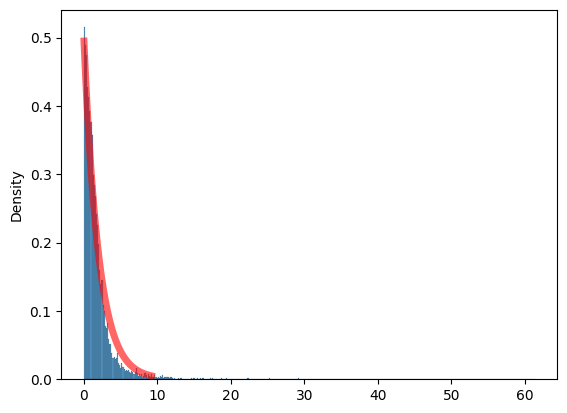

In [126]:
x = jarque_bera_normal(100, 0, 1, 10000)
sns.histplot(x, stat="density")
import scipy.stats as st

df = 2
x = np.linspace(st.chi2.ppf(0.01, 2), st.chi2.ppf(0.99, 2), 100)
plt.plot(x, st.chi2.pdf(x, df), "r-", lw=5, alpha=0.6, label="chi2 pdf")

### (f) Connection to *p*-values
Consider the nullhypothesis
$$H_0: \textrm{The true distribution is normal.}$$
Since the Jarque-Bera test is $\chi^2$-distributed with $2$ degrees of freedom, we can calculate its *p*-value using `scipy.stats.chi2`. Explain *how* you would do this and *why* the result is a *p*-value.

### (g) Power of the test, part (i)
The definition of a *p*-value only mentions the null-hypothesis, but in order for it to be useful it must have **power** against some reasonable alternatives. This means that, for a fixed significance level $\alpha$, the probability is able to detect that $H_0$ isn't true. 

Make a function `simulate_jarque_bera` that takes three arguments `n`, `n_reps` and `random` as arguments. The `random` argument should be a random generator taking one `size` argument. (E.g. `lambda size: rng.normal(mu, sigma, size)`, `lambda size: rng.exponential(lambda, size)`). It should simulate the Jarque-Bera test as we did in Exercise (d), but with the supplied distribution `random` instead of the normal distribution.

### (h) Power of the test, part (ii)
Make a function `power_jarque_bera(n, n_reps, random, alpha = 0.05)`. The first three arguments are the same as the previous exercise, and `alpha` is a significance level. It should return the approximate probability that the `Jarque-Bera` test will be significant at the `alpha` level when the true distribution is `random`.

### (h) Power of the test, part (iii)
Use the `power_jarque_bera(n, n_reps, random, alpha = 0.05)` function to calculate the power of the Jarque-Bera test for $10$ different choices of `random`, and put them into a table. Please make some comments too. (***Hint***: Look at the numpy documentation and find some reasonable distributions to simulate from!)